# Projeto de Disciplina - Clusterização

## Importação de bibliotecas

In [33]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.datasets import make_blobs
from sklearn.datasets import make_moons
from sklearn.preprocessing import StandardScaler
from scipy.cluster import hierarchy
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from yellowbrick.cluster import SilhouetteVisualizer, KElbowVisualizer

## Importação e Normalização dos Dados

In [5]:
dataset = pd.read_csv("datasets/Country-data.csv")
country_data_df = pd.DataFrame(dataset)

In [6]:
country_data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


In [7]:
country_data_df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [8]:
country_data_df['income'] = country_data_df['income'].apply(lambda x: float(x))
country_data_df['gdpp'] = country_data_df['gdpp'].apply(lambda x: float(x))

In [9]:
country_data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    float64
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    float64
dtypes: float64(9), object(1)
memory usage: 13.2+ KB


In [81]:
country_data_df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610.0,9.44,56.2,5.82,553.0
1,Albania,16.6,28.0,6.55,48.6,9930.0,4.49,76.3,1.65,4090.0
2,Algeria,27.3,38.4,4.17,31.4,12900.0,16.10,76.5,2.89,4460.0
3,Angola,119.0,62.3,2.85,42.9,5900.0,22.40,60.1,6.16,3530.0
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100.0,1.44,76.8,2.13,12200.0


In [84]:
N_COUNTRIES=country_data_df['country'].count()

## Dendrogramas

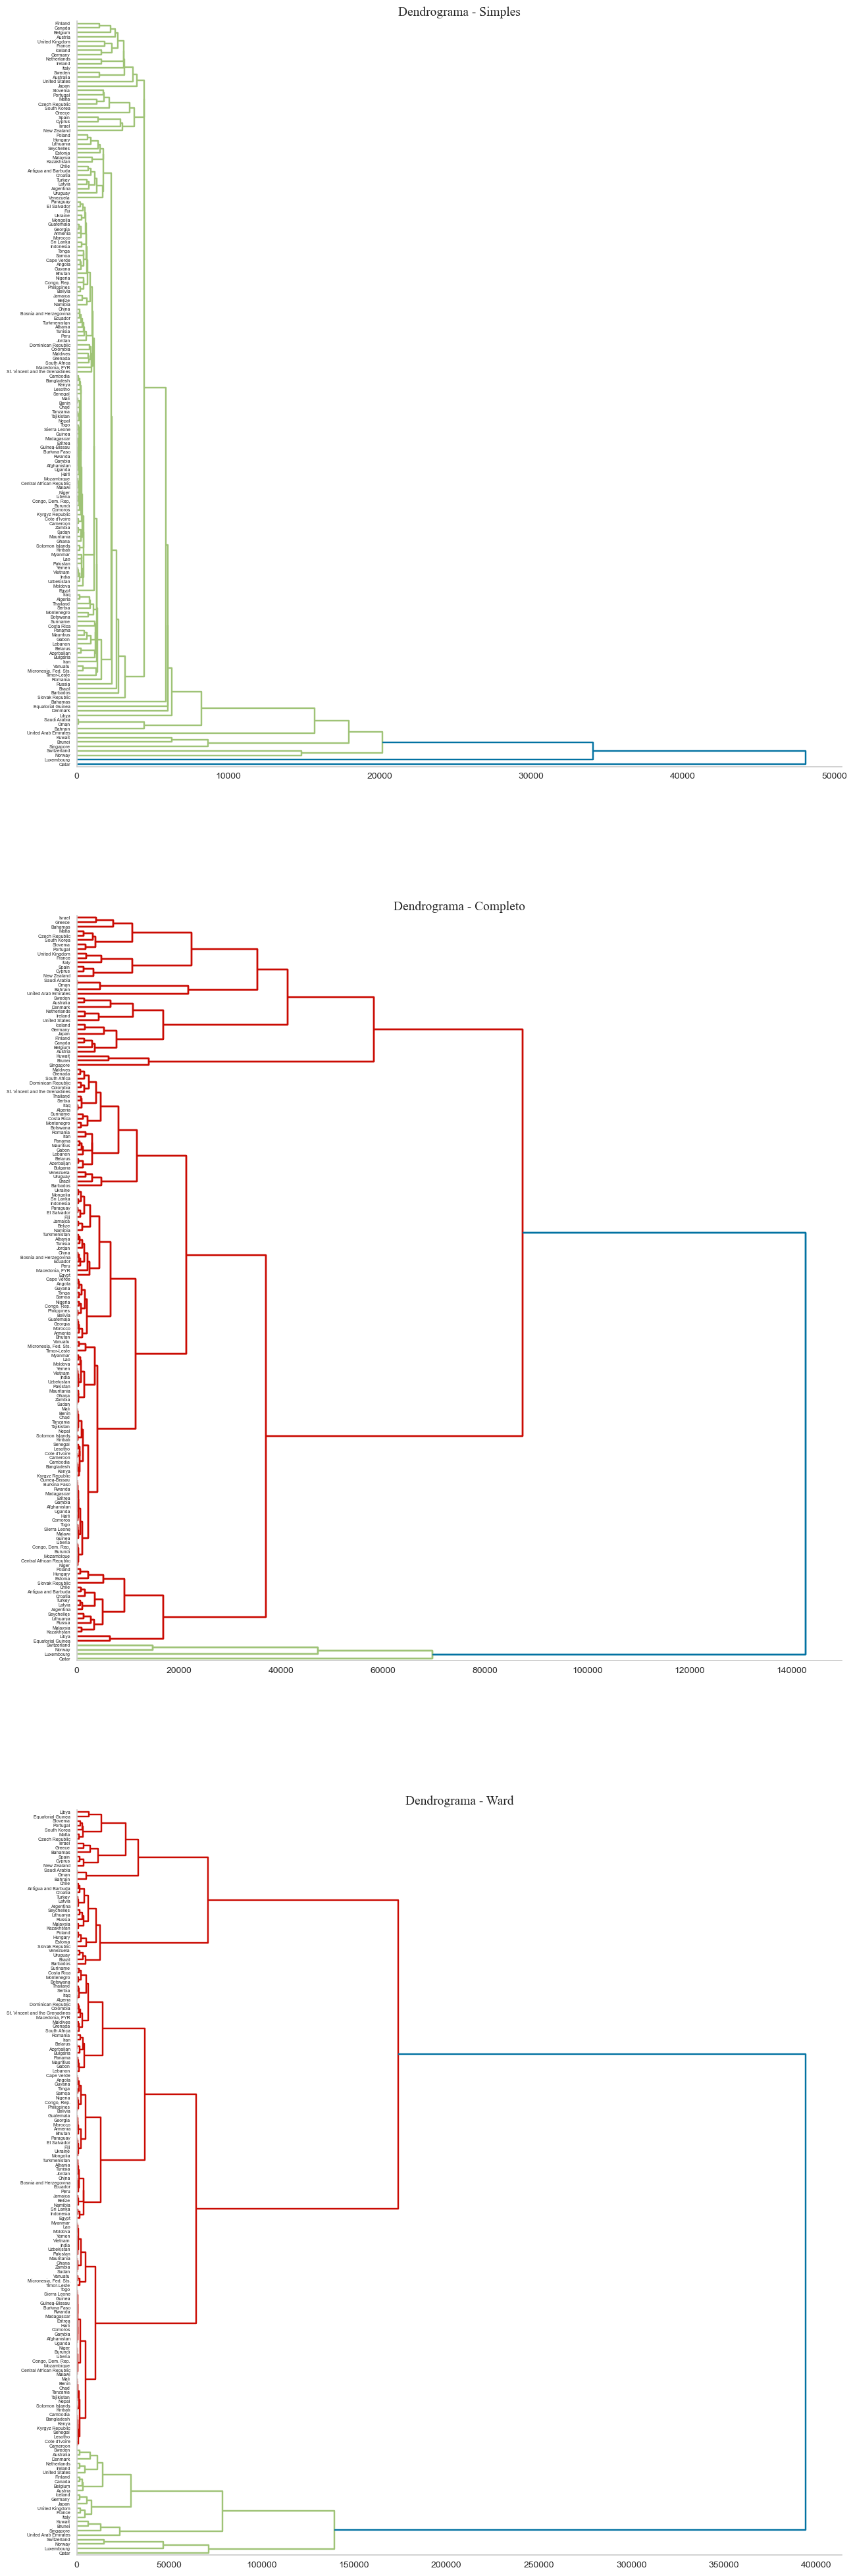

In [85]:
f, ax = plt.subplots(3, 1)
f.set_figheight(50)
f.set_figwidth(15)

single_link = hierarchy.linkage(
    country_data_df.iloc[:,1:],
    metric='euclidean',
    method='single'
)

complete_link = hierarchy.linkage(
    country_data_df.iloc[:,1:],
    metric='euclidean',
    method='complete'
)

ward_link = hierarchy.linkage(
    country_data_df.iloc[:,1:],
    metric='euclidean',
    method='ward'
)

hierarchy.dendrogram(
    single_link,
    labels=country_data_df['country'].values,
    ax=ax[0],
    orientation='right'
)

hierarchy.dendrogram(
    complete_link,
    labels=country_data_df['country'].values,
    ax=ax[1],
    orientation='right'
)

hierarchy.dendrogram(
    complete_link,
    labels=country_data_df['country'].values,
    ax=ax[1],
    orientation='right'
)

hierarchy.dendrogram(
    ward_link,
    labels=country_data_df['country'].values,
    ax=ax[2],
    orientation='right'
)

ax[0].set_title('Dendrograma - Simples', fontfamily='Times New Roman', fontsize=14)
ax[1].set_title('Dendrograma - Completo', fontfamily='Times New Roman', fontsize=14)
ax[2].set_title('Dendrograma - Ward', fontfamily='Times New Roman', fontsize=14)

ax[0].grid(False)
ax[1].grid(False)
ax[2].grid(False)
sb.despine()

## Índice de Silhueta

In [93]:
X, labels = make_blobs(n_samples=N_COUNTRIES, n_features=2, random_state=42)
X_scaled = StandardScaler().fit_transform(X)

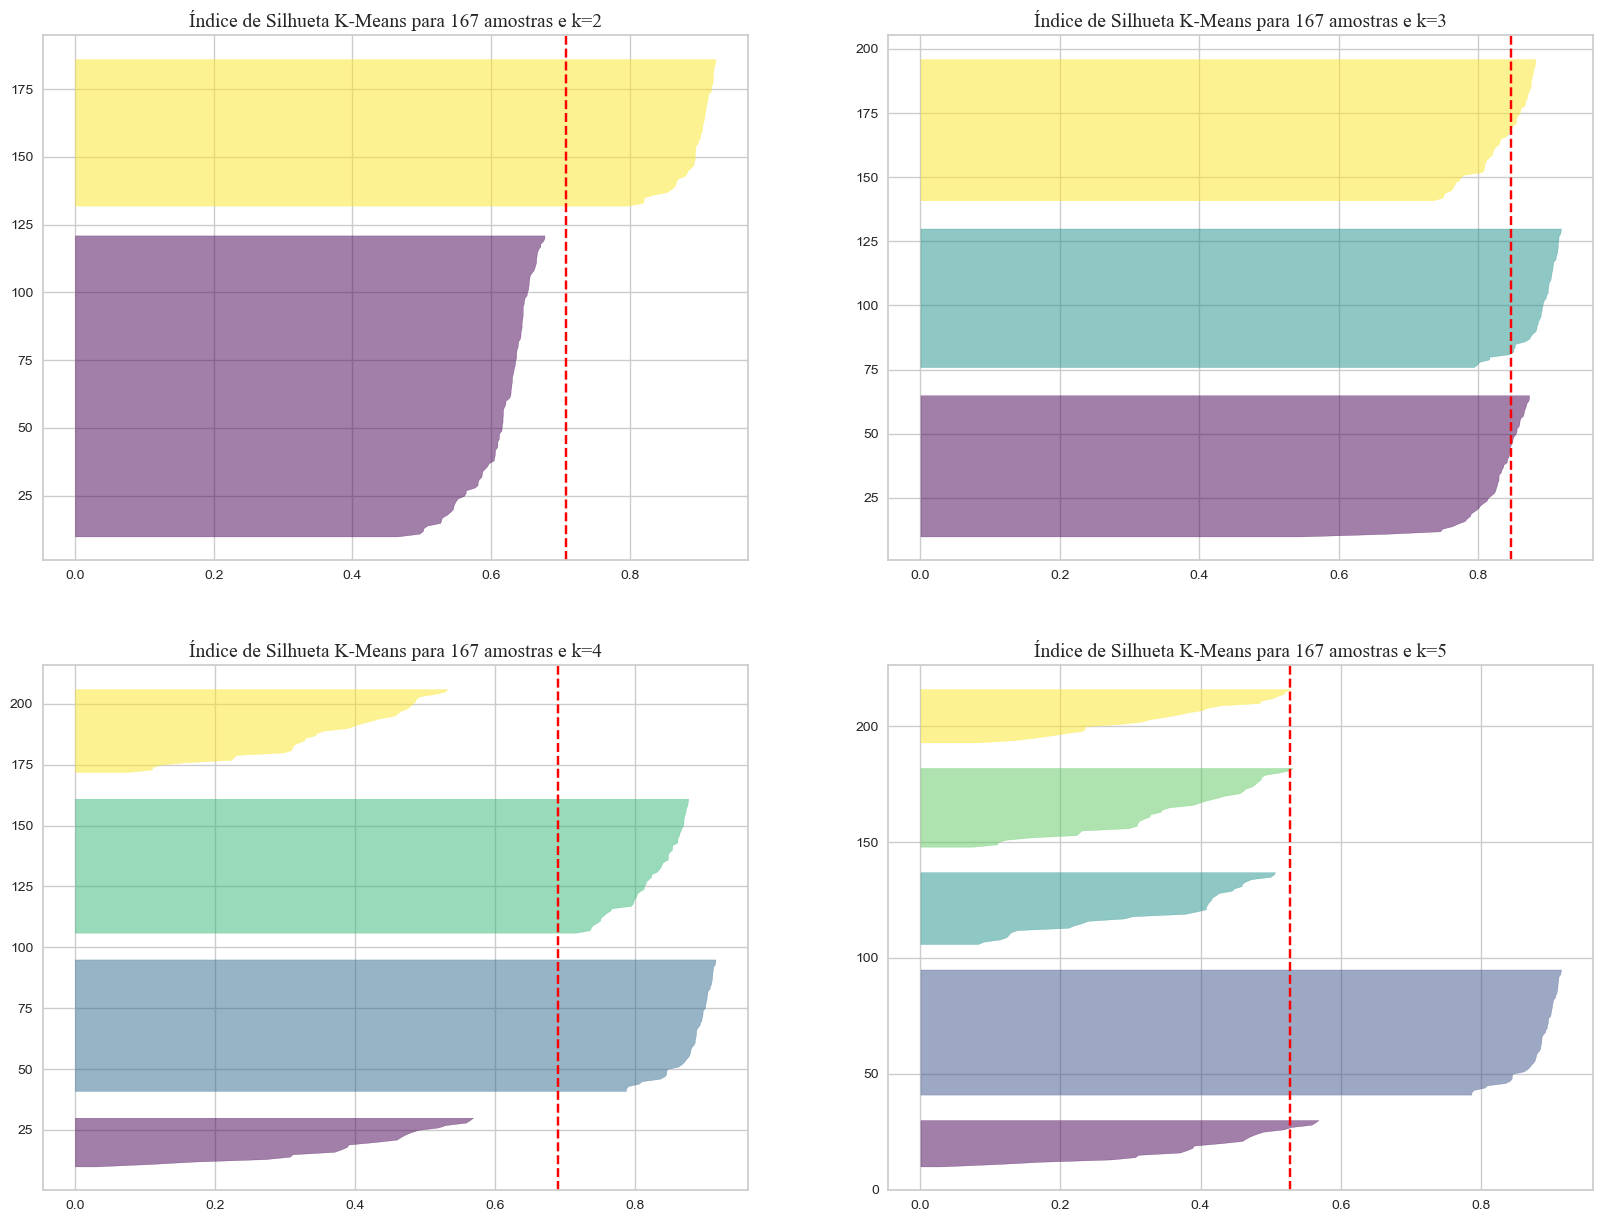

In [87]:
f, ax = plt.subplots(2, 2)
f.set_figheight(15)
f.set_figwidth(20)

for i in range(2,6):
    kmeans = KMeans(n_clusters=i, random_state=42)
    q, mod = divmod(i, 2)
    sv = SilhouetteVisualizer(
        kmeans,
        colors='viridis',
        is_fitted='auto',
        ax=ax[q-1][mod-2]
    )
    ax[q-1][mod-2].set_title(f'Índice de Silhueta K-Means para {len(X)} amostras e k={i}', fontfamily='Times New Roman', fontsize=14)
    sv.fit(X)

## Comparação entre os Índices de Silhueta

- k = 2 - Tamanho não igualitário entre os clusters, indicando que precisa de mais clusters.
- k = 3 - Maior média entre os índices e separação igualitária entre os clusters. Indicação de Número ótimo de Clusters.
- k = 4 - Tamanho não igualitário entre os clusters.
- k = 5 - Tamanho não igualitário entre os clusters. Visivelmente há clusters menores e outros maiores, o que indica excesso de clusters.

Comparando esses 4 gráficos, o que mais se enquadra como quantidade ótima de clusters é 3.

## Método Cotovelo

Também foi utilizado o Método do Cotovelo para descobrir a quantidade ótima de clusters, o que confirmou que o resultado do método anterior.

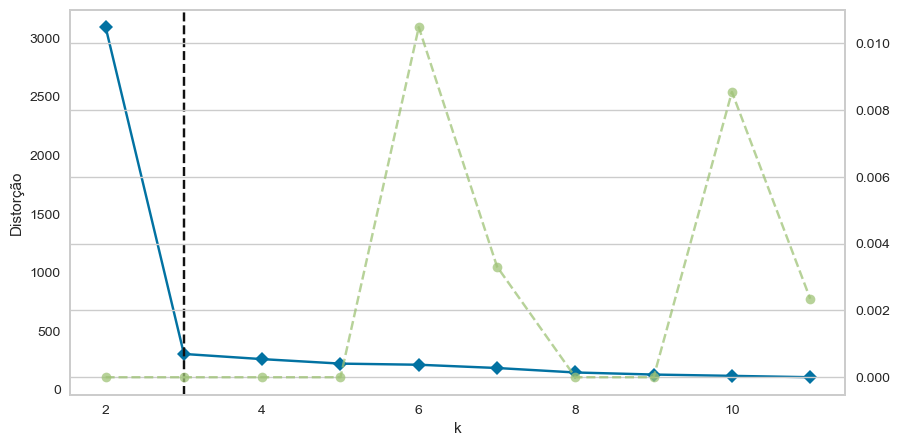

In [88]:
f, ax = plt.subplots(1,1)
f.set_figheight(5)
f.set_figwidth(10)

ax.set_ylabel('Distorção')
ax.set_xlabel('k')
ax.grid(False)
visualizer = KElbowVisualizer(KMeans(), k=(2,12), ax=ax)

visualizer.fit(X)
plt.show()

In [89]:
OPTIMAL_NCLUSTERS=3

## Parametriza o número ótimo de clusters

In [95]:
kmeans = KMeans(n_clusters=OPTIMAL_NCLUSTERS).fit(X_scaled)
kmeans

,n_clusters,3
,init,'k-means++'
,n_init,'auto'
,max_iter,300
,tol,0.0001
,verbose,0
,random_state,None
,copy_x,True
,algorithm,'lloyd'


In [91]:
dbscan = DBSCAN(eps=0.15, min_samples=5, n_jobs=-1)
dbscan

,eps,0.15
,min_samples,5
,metric,'euclidean'
,metric_params,None
,algorithm,'auto'
,leaf_size,30
,p,None
,n_jobs,-1


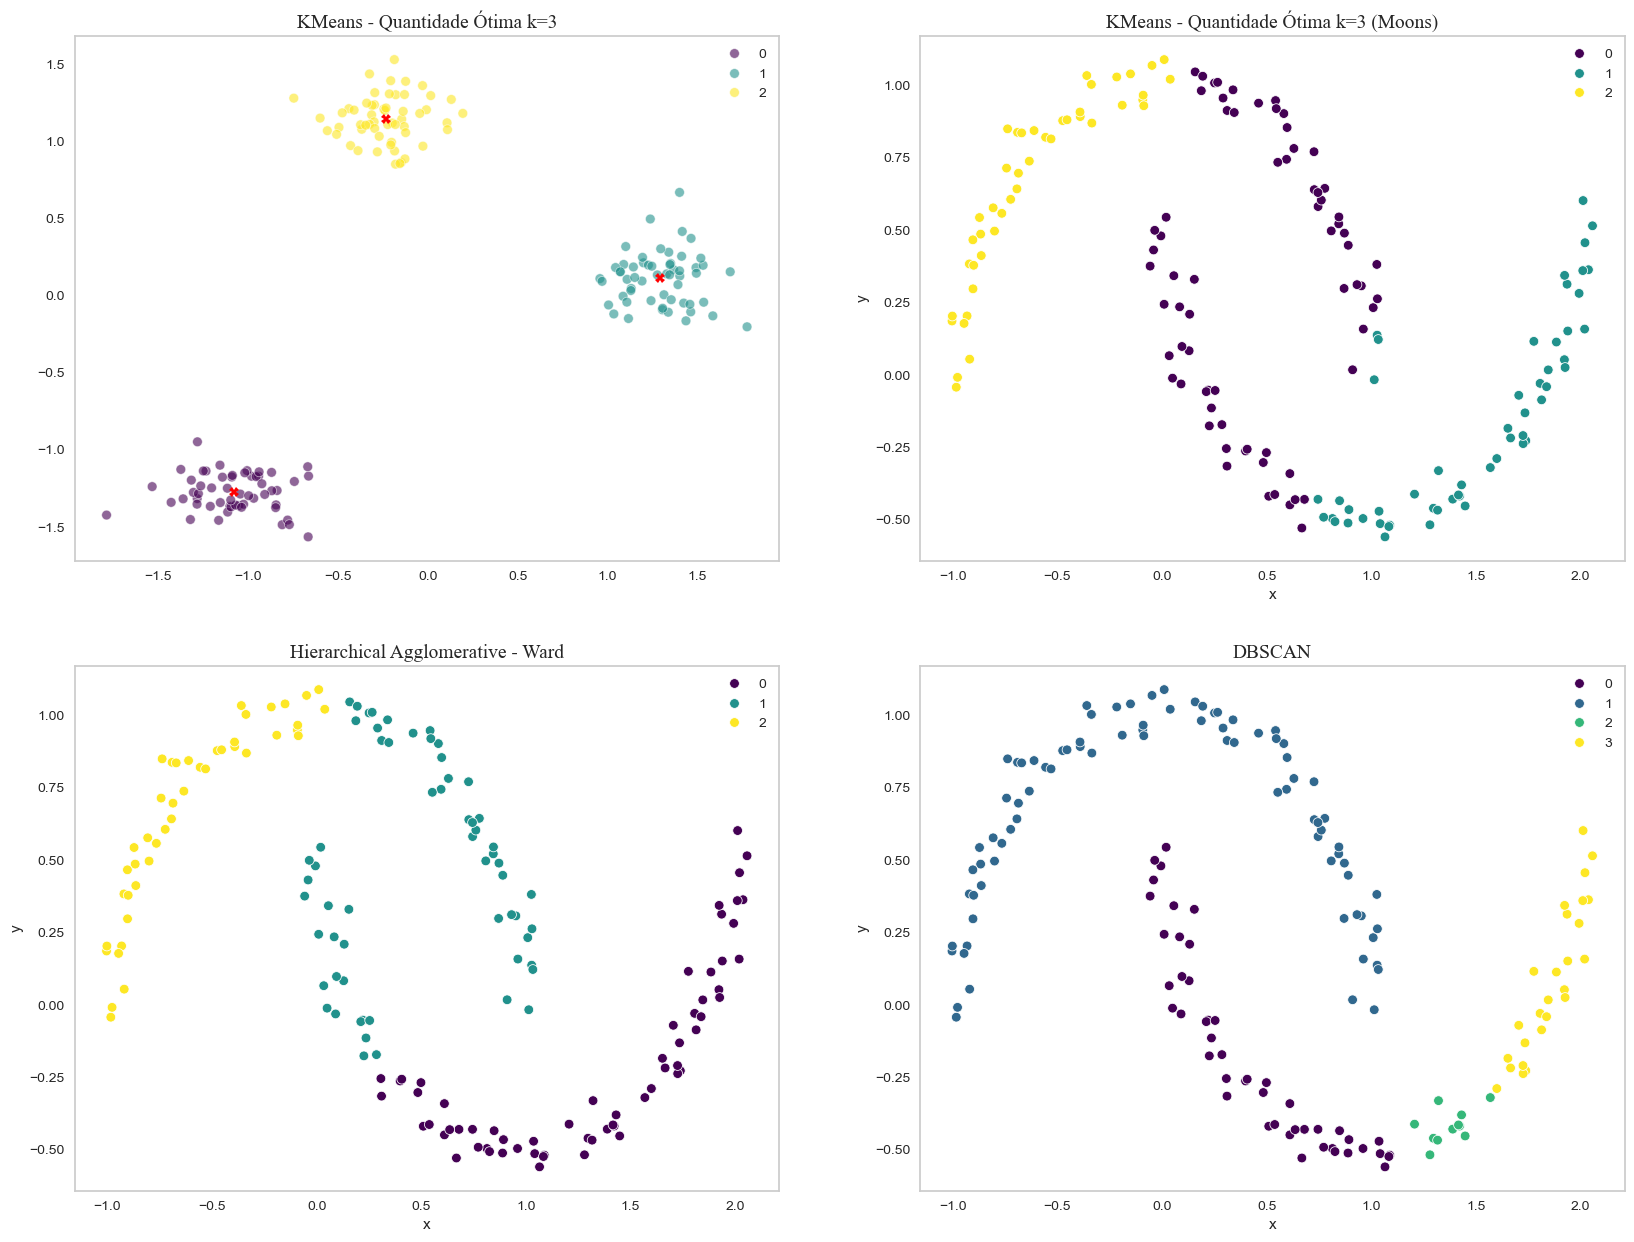

In [111]:
f, ax = plt.subplots(2, 2)
f.set_figheight(15)
f.set_figwidth(20)

sb.scatterplot(
    x=X_scaled[:,0],
    y=X_scaled[:,1],
    hue=kmeans.labels_,
    palette='viridis',
    ax=ax[0][0],
    alpha=0.6
)

ax[0][0].plot(
    [x for x, _ in kmeans.cluster_centers_],
    [y for _, y in kmeans.cluster_centers_],
    'X',
    color='red'
)

X_, y_ = make_moons(n_samples=N_COUNTRIES, random_state=42, noise=0.05)
moon_df = pd.DataFrame(dict(x=X_[:, 0], y=X_[:, 1], label=y_))

kmeans_moons = KMeans(n_clusters=OPTIMAL_NCLUSTERS).fit(X_)
sb.scatterplot(
    data=moon_df,
    x='x',
    y='y',
    hue=kmeans_moons.labels_,
    palette='viridis',
    ax=ax[0][1]
)


ward = AgglomerativeClustering(n_clusters=OPTIMAL_NCLUSTERS, linkage='ward').fit(X_)
sb.scatterplot(
    data=moon_df,
    x='x',
    y='y',
    hue=ward.labels_,
    palette='viridis',
    ax=ax[1][0]
)

dbscan_labels = dbscan.fit_predict(X_)
sb.scatterplot(
    data=moon_df,
    x='x',
    y='y',
    hue=dbscan_labels,
    palette='viridis',
    ax=ax[1][1]
)

ax[0][0].set_title('KMeans - Quantidade Ótima k=3', fontfamily='Times New Roman', fontsize=14)
ax[0][1].set_title('KMeans - Quantidade Ótima k=3 (Moons)', fontfamily='Times New Roman', fontsize=14)
ax[1][0].set_title('Hierarchical Agglomerative - Ward', fontfamily='Times New Roman', fontsize=14)
ax[1][1].set_title('DBSCAN', fontfamily='Times New Roman', fontsize=14)

ax[0][0].grid(False)
ax[0][1].grid(False)
ax[1][0].grid(False)
ax[1][1].grid(False)